# PCA

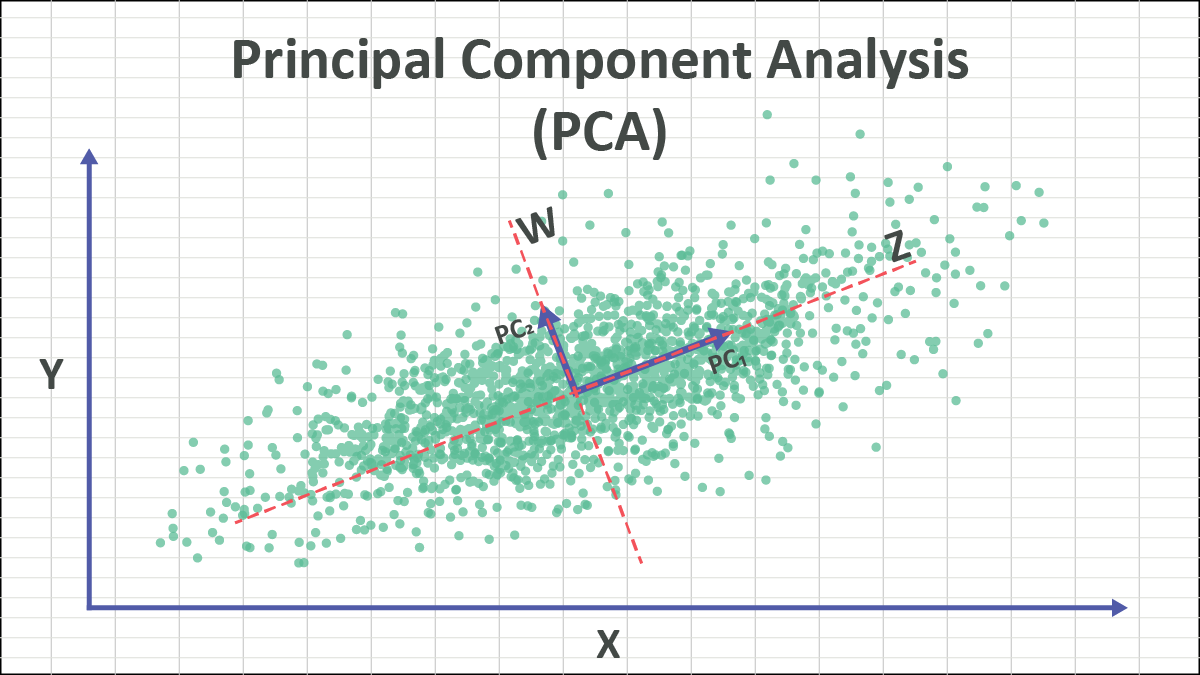

With prinicipal component analysis, we will try to eliminate redundant and highly correlated data, keeping only the most significant features for further analysis.

Here are the steps of PCA:

1. Standardize Data: \ 

    * We standardize our data with the formula $z = \frac{x - \mu}{\sigma}$

2. Compute Covariance/Correlation Matrix: \

    * We can calculate our covariance/correlation matrix with the formula $M = \frac{1}{n-1} \cdot AA^T$

    * For standardized data, this formula computes the covariance matrix of size $m x m$. The off-diagonal elements of the covariance matrix represent the covariances between pairs of variables. These covariances indicate how much two variables vary together. In PCA, these covariances provide insights into the relationships between variables and help identify patterns of correlation. The diagonal elements represent the variances of the original variables. 

3. Eigenvalue Decomposition
        
    * We need to calculate the eigenvalues and eigenvectors of our covariance matrix. In order to do this, we can perform Singular Value Decomposition. We calculate $U, \sigma , and V$, such that $M = U \sigma V^T$. With the eigenvalues and eigenvectors, we can identify the principal components for our next step.  

4. Select Principal Components

    * We must arrange the eigenvalues in decreasing order. The first principal component is in the direction of the first eigenvector, and so forth.  

5. Reduce Dimensionality

     * We can ultimately reduce the dimensionality of our original data by projecting the data points onto our selected principal components. 



Let's run PCA on our Auto-MPG dataset with five of its features: horsepower, cylinders, displacement, weight, and acceleration. 

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

auto = pd.read_csv("/Users/kritinshanmugam/Downloads/auto-mpg.csv")
auto = auto[auto['horsepower'] != '?']
X = auto.drop(['car name', 'mpg'], axis=1)
X = X.astype('float64')

# Standardize the data (Step 1)
X = (X - X.mean())/X.std()
X = X[['horsepower', 'weight', 'displacement', 'cylinders', 'acceleration']].astype('float64').values

y = auto['mpg'].astype('float64').values

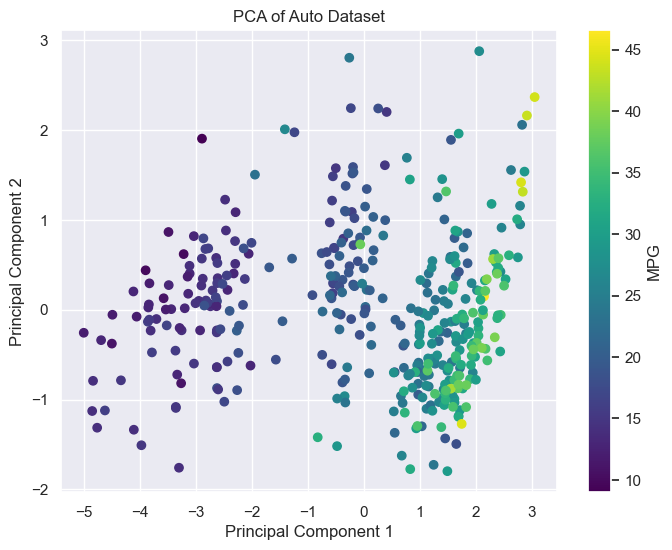

In [28]:
# Step 2 (Compute Covariance)

covariance = np.cov(X, rowvar=False)

# Step 3 (Compute eigenvalues and eigenvectors)
eigenvalues, eigenvectors = np.linalg.eig(covariance)

# Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Keep thet top two principal components
n_components = 2
selected_eigenvalues = sorted_eigenvalues[:n_components]
selected_eigenvectors = sorted_eigenvectors[:, :n_components]

X_transformed = np.dot(X, selected_eigenvectors)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Auto Dataset')
plt.colorbar(label='MPG')
plt.show()





In this plot, the X-axis represents the first principal component and the y-axis represents the second principal component. They were chosen after projecting our original features matrix onto the top two eigenvectors. Each datapoint in the plot represents the projection of X onto the vectors. The color of each data point is determined by the value of the mpg. The color bar on the right side of the plot provides a reference for interpreting the MPG values associated with different colors.

By examining the distribution of data points in the plot, we can observe how samples are clustered or dispersed in the reduced-dimensional space defined by the principal components.To be more specific, we can see how higher mpg cars are clustered in the left area, with negative feature values of the first principal component and close-to-zero values of the second principal component. 


Now, we can use our new X_transformed variable as the input for a machine learning model. Let's run a Random Forest Regression model with our new data and see how it performs. 

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y)
r_forest = RandomForestRegressor(max_depth=5)
r_forest.fit(X_train, y_train)
random_preds = r_forest.predict(X_test)
print("PCA MSE Score \n")
print(mean_squared_error(y_test, random_preds))

X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed = train_test_split(X_transformed, y)
r_forest_t = RandomForestRegressor(max_depth=5)
r_forest_t.fit(X_train_transformed, y_train_transformed)
random_preds_t = r_forest_t.predict(X_test_transformed)
print("PCA MSE Score \n")
print(mean_squared_error(y_test_transformed, random_preds_t))




PCA Classification Report 

17.06651697503742
PCA Classification Report 

10.34075647116882


## Conclusion

As we can see, our PCA transformation resulted in a lower MSE score than our original features matrix. Principal component analysis is a simple way to reduce the dimensionality of our data and maintain great performance. 

This concludes our tour of machine learning model. I hope you enjoyed!